# Lab - 4

Name: Purusharth Malik

Registration No.: 2348542

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Plotting RGB images
def plot_image(img, title, og_im = cv2.cvtColor(cv2.imread('images/bird.png'), cv2.COLOR_BGR2RGB), og_title="Original Image"):    
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(og_im)
    plt.title(og_title)
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title(title)
    plt.show()

### Filtering Noise

First, we will introduce noise and then we will filter it using an average filter.

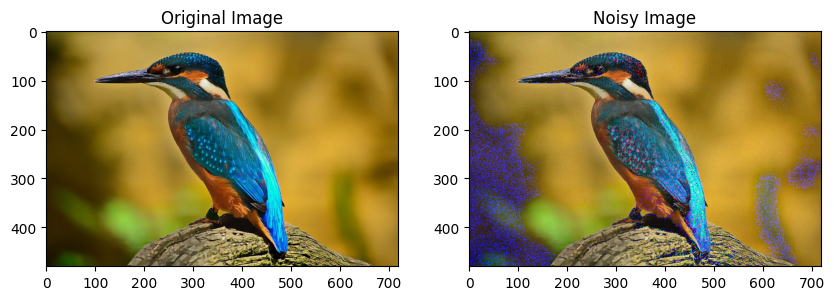

In [45]:
# Loading the image and adding noise to it
img = cv2.cvtColor(cv2.imread('images/bird.png'), cv2.COLOR_BGR2RGB)
H, W, C = img.shape

# Using random values from a normal distribution with mean 0 and standard deviation 5
noise = np.random.normal(0, 5, (H, W, C)).astype(np.uint8)

# Adding noise to image
noisy_img = img+noise

plot_image(noisy_img, "Noisy Image")

For filtering, we will use a 4x4 kernel.

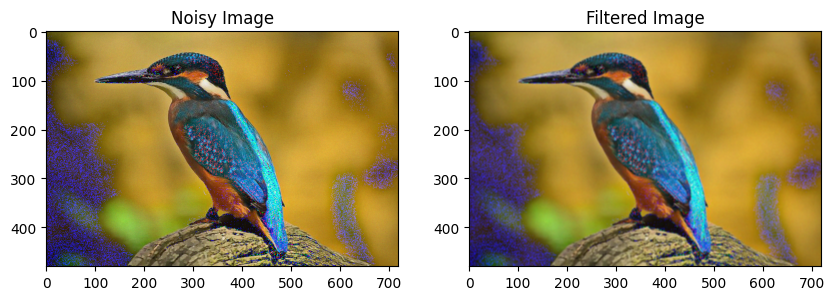

In [46]:
# Filtering with an average filter
kernel = np.ones((4,4))/16

filtered_img = cv2.filter2D(noisy_img, ddepth=-1, kernel=kernel)

plot_image(filtered_img, "Filtered Image", og_im=noisy_img, og_title='Noisy Image')

### Gaussian Blur

We will try to blur the same noisy image with a kernel of size 11x11 that has SD = 10 in both `x` and `y` directions.

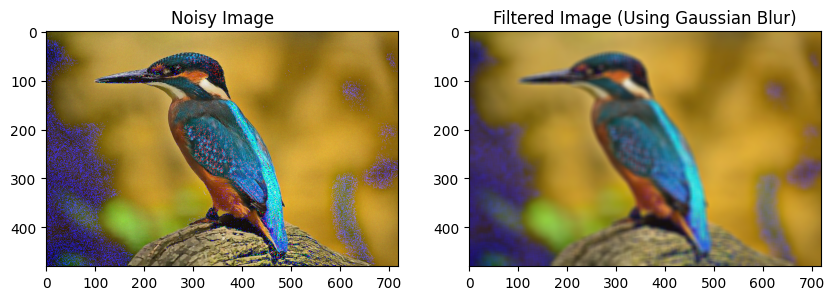

In [51]:
filtered_img = cv2.GaussianBlur(noisy_img, (11,11), sigmaX=10, sigmaY=10)

plot_image(filtered_img, "Filtered Image (Using Gaussian Blur)", og_im=noisy_img, og_title='Noisy Image')

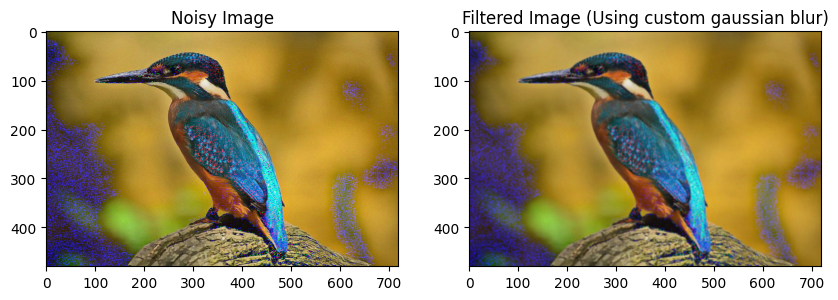

In [52]:
"""
Here, we use a kernel of size 5x5
for our custom implementation of the
Gaussian Blur filter.
"""
kernel = 1/273*np.array([[1,4,7,4,1],
                         [4,16,25,16,4],
                         [7,25,41,25,7],
                         [4,16,25,16,4],
                         [1,4,7,4,1]])

filtered_img = cv2.filter2D(noisy_img, ddepth=-1, kernel=kernel)

plot_image(filtered_img, "Filtered Image (Using custom gaussian blur)", og_im=noisy_img, og_title='Noisy Image')

### Image Sharpening

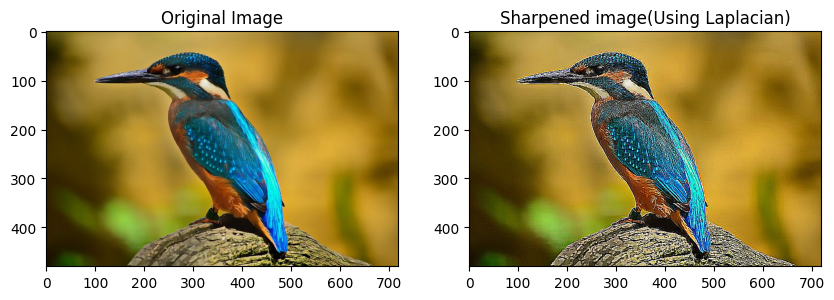

In [60]:
# We are using the following Laplacian filter
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])

sharpened = cv2.filter2D(img, ddepth=-1, kernel=kernel)

plot_image(sharpened, title="Sharpened image(Using Laplacian)")

# End